# Paso 1. Acceda los datos y prepáralos para el análisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visits = pd.read_csv('./documentosparapy/visits_log_us.csv')
orders = pd.read_csv('./documentosparapy/orders_log_us.csv')
costs = pd.read_csv('./documentosparapy/costs_us.csv')

Importamos librerias y cargamos lo datos 

In [3]:
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     -------------- 

In [4]:
print(visits.head())
print(orders.head())
print(costs.head())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06

Visualizamos los datos.

# Paso 2. Haz informes y calcula métricas 


## Visitas:

In [8]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")

visits['session_year'] = visits['Start Ts'].dt.isocalendar().year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week'] = visits['Start Ts'].dt.isocalendar().week
visits['session_date'] = visits['Start Ts'].dt.date


Convertimos a tipo fecha los datos que se encuentran como fechas.Y extraemos el año, mes, semana y fecha


In [10]:
dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

Calculamos  DAU, WAU, MAU (promedio de usuarios únicos por periodo) para asi saber cuántas personas lo usan cada día, semana y mes.


In [12]:
sticky_wau = (dau_total / wau_total * 100)
sticky_mau = (dau_total / mau_total * 100)

Calculamos el porcentaje de usuarios semanales y mensuales que usan la app diariamente.

In [14]:
print(f"DAU promedio: {dau_total.values[0]:.0f} usuarios")
print(f"WAU promedio: {wau_total.values[0]:.0f} usuarios")
print(f"MAU promedio: {mau_total.values[0]:.0f} usuarios")
print(f"Sticky Factor (DAU/WAU): {sticky_wau.values[0]:.0f}%")
print(f"Sticky Factor (DAU/MAU): {sticky_mau.values[0]:.0f}%")

DAU promedio: 908 usuarios
WAU promedio: 5716 usuarios
MAU promedio: 23228 usuarios
Sticky Factor (DAU/WAU): 16%
Sticky Factor (DAU/MAU): 4%


Por lo que tenemos:
908 personas que lo usan cada dia.
5716 personas lo usan cada semana.
23228 personas lo usan cada mes.
De los cuales de las personas que lo usan cada semanas solo el 16% lo usa diario.
Y de las personas que lo usan cada mes solo el 4% lo usa diario.

In [16]:

sessions_per_day = visits.groupby('session_date').agg({'Uid': ['count', 'nunique']})

sessions_per_day.columns = ['n_sessions', 'n_users']

sessions_per_day['sessions_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']


print(sessions_per_day)

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           664      605           1.097521
2017-06-02           658      608           1.082237
2017-06-03           477      445           1.071910
2017-06-04           510      476           1.071429
2017-06-05           893      820           1.089024
...                  ...      ...                ...
2018-05-27           672      620           1.083871
2018-05-28          1156     1039           1.112608
2018-05-29          1035      948           1.091772
2018-05-30          1410     1289           1.093871
2018-05-31          2256     1997           1.129695

[364 rows x 3 columns]


Podemos observar que las sesiones por usuario no pasan a 2 o mas por lo que un usuario no puede tener más de una sesión al dia.


La duración promedio es de  643.506488592098


Text(0.5, 1.0, 'Distribución de Duración de Sesiones')

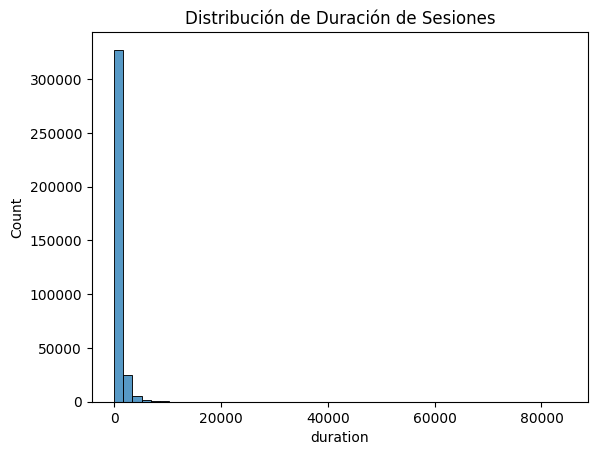

In [18]:
visits['duration'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
print("La duración promedio es de ", visits['duration'].mean())
sns.histplot(visits['duration'], bins=50)
plt.title('Distribución de Duración de Sesiones')

Podemos ver que la sesiones no duran mucho,parece ser que hay un problema al abrir la pagina,pues sus visitas solo duran 0 segundos y poco mas.
Veremos su moda para tener mejor vista de los datos,ya que la media no lo representa del todo:

In [20]:
print(visits['duration'].mode())

0    60
Name: duration, dtype: int32


60 segundos es lo que dura,puede ser debido a la dificultada para manejar la pagina,o incluso pueden ser fallos que provocan que la pagina se cierre.Tendremos que investigar.

## Ventas:

Text(0.5, 1.0, 'Días desde Registro hasta Primera Compra')

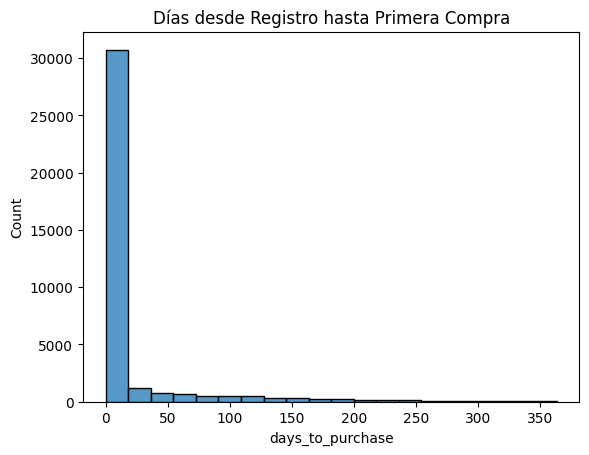

In [23]:
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
conversion_time = pd.merge(first_visit, first_purchase, on='Uid')
conversion_time['Start Ts'] = pd.to_datetime(conversion_time['Start Ts'])
conversion_time['Buy Ts'] = pd.to_datetime(conversion_time['Buy Ts'])
conversion_time['days_to_purchase'] = (conversion_time['Buy Ts'] - conversion_time['Start Ts']).dt.days
sns.histplot(conversion_time['days_to_purchase'], bins=20)
plt.title('Días desde Registro hasta Primera Compra')

Podemos observar que pasan normalmente menos de 50 dias para que la gente haga la compra.Por lo que podemos observar que normalmente cuando la gente entra a la pagina  compra entradas a los eventos en pocos dias.

In [25]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S") 
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase.columns = ['Uid', 'first_purchase_date']
orders_with_cohort = orders.merge(first_purchase, on='Uid')

orders_with_cohort['purchase_month'] = orders_with_cohort['Buy Ts'].dt.to_period('M')
orders_with_cohort['first_purchase_month'] = orders_with_cohort['first_purchase_date'].dt.to_period('M')

orders_per_cohort = orders_with_cohort.groupby('first_purchase_month').agg(
    n_orders=('Uid', 'count')  # Número de pedidos por cohorte
).reset_index()

print("Número de pedidos por cohorte:")
print(orders_per_cohort.head(10))




Número de pedidos por cohorte:
  first_purchase_month  n_orders
0              2017-06      4438
1              2017-07      2910
2              2017-08      2188
3              2017-09      3878
4              2017-10      6005
5              2017-11      5900
6              2017-12      5894
7              2018-01      4308
8              2018-02      4470
9              2018-03      4484


In [29]:

average_purchase_size = orders_with_cohort.groupby('first_purchase_month').agg(
    avg_revenue=('Revenue', 'mean') 
).reset_index()

print("\nTamaño promedio de compra por cohorte:")
print(average_purchase_size.head(10))



Tamaño promedio de compra por cohorte:
  first_purchase_month  avg_revenue
0              2017-06     5.414982
1              2017-07     5.542241
2              2017-08     5.304506
3              2017-09     8.941805
4              2017-10     4.596744
5              2017-11     4.423558
6              2017-12     5.681327
7              2018-01     3.867950
8              2018-02     3.747315
9              2018-03     4.298263


Podemos ver el numero de pedidos desde  2017-06-01  a 2018-03-01,al igual que sus tamaños de compra, donde:

Octubre de 2017 tuvo la mayor cantidad de pedidos, sin embargo, su ingreso promedio por pedido ( 4.59 ) fue relativamente bajo.

Por otro lado en septiembre de 2017 tuvo menos pedidos, pero el ticket promedio fue mucho más alto ( 8.94 ), lo cual puede indicar compras más grandes o productos más caros.

Las cohortes recientes (2018) muestran un volumen de pedidos moderado pero una baja en el tamaño promedio de compra, lo que puede alertar sobre un cambio en el comportamiento del cliente o en la oferta de productos.

In [31]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S") 

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders['order_month'] = orders['Buy Ts'].dt.to_period('M').dt.to_timestamp()

first_orders = orders.groupby('Uid')['order_month'].min().reset_index()
first_orders.columns = ['Uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month')['Uid'].nunique().reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders_with_cohort = pd.merge(orders, first_orders, on='Uid')

cohort_data = orders_with_cohort.groupby(['first_order_month', 'order_month'])['Revenue'].sum().reset_index()

report = pd.merge(cohort_sizes, cohort_data, on='first_order_month')


report['age'] = (
    (report['order_month'].values.astype('datetime64[M]') - 
    report['first_order_month'].values.astype('datetime64[M]')
) / np.timedelta64(1, 'M'))

report['age'] = report['age'].round().astype('int') 

margin_rate = 0.5
report['ltv'] = (report['Revenue'] * margin_rate) / report['n_buyers']

report['ltv_cumulative'] = report.groupby('first_order_month')['ltv'].cumsum()

ltv_pivot = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv_cumulative',
    aggfunc='sum',
    fill_value=0
).round(2)


print("LTV Acumulado por Cohorte ($):")
display(ltv_pivot)


LTV Acumulado por Cohorte ($):


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.36,2.60,2.82,3.30,3.81,4.18,4.66,4.95,5.22,5.53,5.81,5.94
2017-07-01,3.01,3.17,3.48,3.66,3.75,3.83,3.89,3.96,4.04,4.12,4.19,0.00
2017-08-01,2.64,2.87,3.10,3.30,3.55,3.69,3.79,4.00,4.14,4.24,0.00,0.00
2017-09-01,2.82,3.38,3.64,5.63,5.83,6.15,6.50,6.63,6.72,0.00,0.00,0.00
2017-10-01,2.50,2.77,2.87,2.94,3.02,3.08,3.12,3.18,0.00,0.00,0.00,0.00
2017-11-01,2.58,2.78,2.88,3.04,3.11,3.14,3.20,0.00,0.00,0.00,0.00,0.00
2017-12-01,2.37,2.50,2.96,3.49,3.65,3.82,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,2.07,2.22,2.37,2.44,2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,2.08,2.22,2.26,2.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Con su LTV acumulativo podemos ver que el cohorte de septiembre 2017 es la más valiosa hasta ahora: tiene el LTV más alto acumulado en menos tiempo.

Los cohortes de finales de 2017 (sep-dic) fueron fuertes en generación de valor. Mientras que los cohortes de 2018 comenzaron con un LTV inicial ligeramente más bajo, lo cual puede indicar un cambio en el comportamiento del cliente, en el producto o en la estrategia de adquisición.


## Marketing:


In [36]:
total_spent = costs['costs'].sum()
print(f"Total gastado en marketing: ${total_spent:,.2f} USD")

Total gastado en marketing: $329,131.62 USD


[ 1  2  3  4  5  9 10]


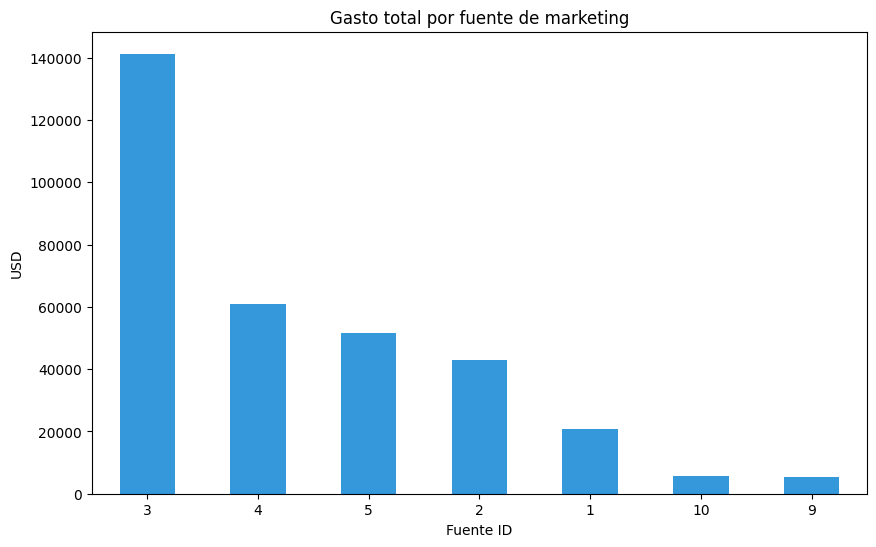

In [39]:
print(costs['source_id'].unique())
spent_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
spent_by_source.plot(kind='bar', color='#3498db')
plt.title('Gasto total por fuente de marketing')
plt.ylabel('USD')
plt.xlabel('Fuente ID')
plt.xticks(rotation=0)
plt.show()

Podemos ver que la fuente con fuente id 3 es la que mas gasto genera,siguendole el 4 y el 5.

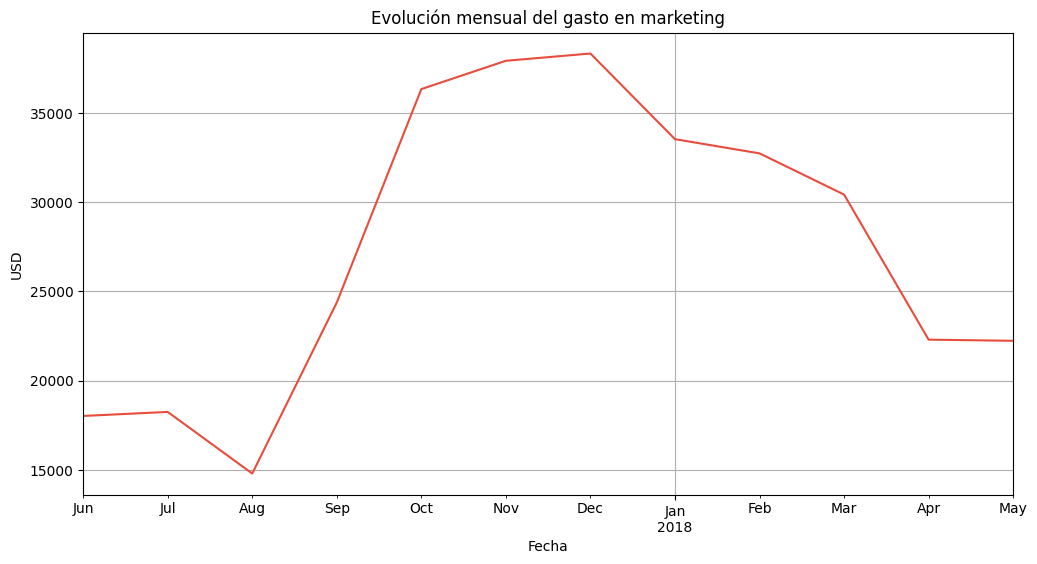

In [42]:

costs['dt'] = pd.to_datetime(costs['dt'])

monthly_spending = costs.resample('M', on='dt')['costs'].sum()
costs.set_index('dt', inplace=True)

monthly_spending = costs['costs'].resample('M').sum()
plt.figure(figsize=(12,6))
monthly_spending.plot(color='#e74c3c')
plt.title('Evolución mensual del gasto en marketing')
plt.ylabel('USD')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

Podemos ver que el gastos subio en los ultimos meses del 2017 (de sep a dec),esto se puede deber a las ventas que se tienen en esos meses,gracias al fin de año.

   source_id      costs  n_buyers        cac
0          1   20833.27      2899   7.186364
1          2   42806.04      3506  12.209367
2          3  141321.63     10473  13.493901
3          4   61073.60     10296   5.931779
4          5   51757.10      6931   7.467479
5          9    5517.49      1088   5.071222
6         10    5822.49      1329   4.381106


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '9'),
  Text(6, 0, '10')])

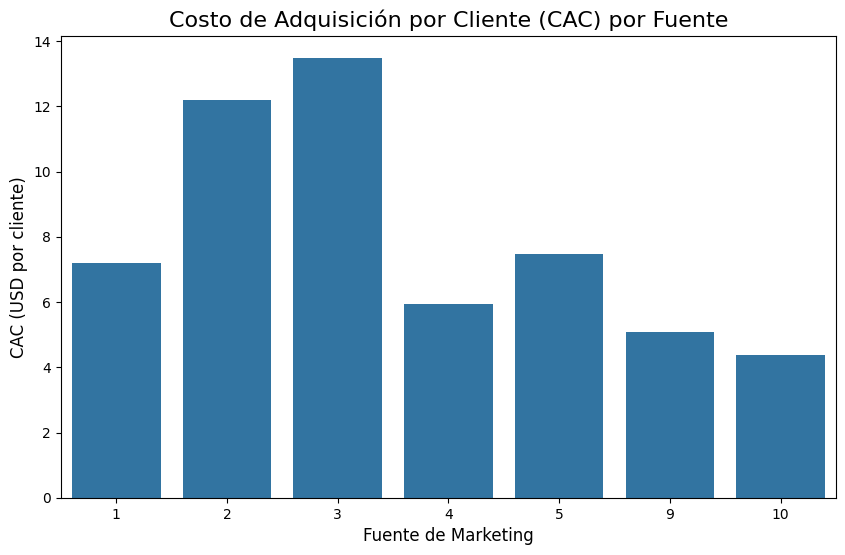

In [46]:
first_source = visits.sort_values('Start Ts').groupby('Uid')['Source Id'].first().reset_index()

buyers_by_source = pd.merge(orders[['Uid']].drop_duplicates(), 
                          first_source, 
                          on='Uid')['Source Id'].value_counts().reset_index()
buyers_by_source.columns = ['source_id', 'n_buyers']

costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

cac_by_source = pd.merge(costs_by_source, buyers_by_source, on='source_id')
cac_by_source['cac'] = cac_by_source['costs'] / cac_by_source['n_buyers']

print(cac_by_source)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=cac_by_source.sort_values('cac'), 
            x='source_id', 
            y='cac',)

plt.title('Costo de Adquisición por Cliente (CAC) por Fuente', fontsize=16)
plt.xlabel('Fuente de Marketing', fontsize=12)
plt.ylabel('CAC (USD por cliente)', fontsize=12)
plt.xticks(rotation=0)


In [47]:
costs = costs.reset_index()


In [48]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  79 non-null     datetime64[ns]
 1   n_buyers           79 non-null     int64         
 2   order_month        79 non-null     datetime64[ns]
 3   Revenue            79 non-null     float64       
 4   age                79 non-null     int32         
 5   ltv                79 non-null     float64       
 6   ltv_cumulative     79 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(1)
memory usage: 4.1 KB


Podemos ver que  el costo de adquisición de clientes de cada una de las fuentes ,en donde al igual que el gasto por cada fuente, la fuente 3 es la que mas costo genera con 13.49,siendo la funeta 2 la segunda que mas costo genera con 12.21.

In [50]:

costs['order_month'] = pd.to_datetime(costs['dt']).dt.to_period('M')
first_costs = costs.groupby('source_id').agg({'order_month': 'min'}).reset_index()
first_costs.columns = ['source_id', 'first_order_month']
first_costs['first_order_month'] = first_costs['first_order_month'].dt.to_timestamp()

report = pd.merge(report, first_costs, on='first_order_month')
report = pd.merge(report,cac_by_source, on='source_id')
report['romi'] = report['ltv'] / report['cac']

output = report.pivot_table(
    index='source_id',  
    columns='age', 
    values='romi', 
    aggfunc='mean'
)

resultado_romi = output.cumsum(axis=1).round(2)

print(resultado_romi)

age          0     1     2     3     4     5     6     7     8     9     10  \
source_id                                                                     
1          0.33  0.36  0.39  0.46  0.53  0.58  0.65  0.69  0.73  0.77  0.81   
2          0.19  0.21  0.23  0.27  0.31  0.34  0.38  0.41  0.43  0.45  0.48   
3          0.18  0.19  0.21  0.24  0.28  0.31  0.34  0.37  0.39  0.41  0.43   
4          0.40  0.44  0.48  0.56  0.64  0.70  0.78  0.83  0.88  0.93  0.98   
5          0.32  0.35  0.38  0.44  0.51  0.56  0.62  0.66  0.70  0.74  0.78   
9          0.47  0.51  0.56  0.65  0.75  0.82  0.92  0.98  1.03  1.09  1.15   
10         0.54  0.59  0.64  0.75  0.87  0.95  1.06  1.13  1.19  1.26  1.33   

age          11  
source_id        
1          0.83  
2          0.49  
3          0.44  
4          1.00  
5          0.80  
9          1.17  
10         1.36  


In [51]:
output.mean(axis=0)


age
0     0.345255
1     0.035467
2     0.031982
3     0.069766
4     0.074726
5     0.053750
6     0.069457
7     0.042502
8     0.040428
9     0.044270
10    0.041747
11    0.018771
dtype: float64

Podemos observar que la fuente 10 ,9 y 4 son las fuentres que han recuperado su inversion con el paso de 11 meses.siendo solo la fuente 10 y 11 son las que generaron rendimiento 36% y 17%. 


# Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde


Enfocantome en la metricas DAU, WAU, MAU  y Sticky Factor (DAU/WAU) y Sticky Factor (DAU/MAU),pudimos ver que tenemos un promedio de 23228 personas al mes,5716 a la semana y 908 al dia.De los cuales tenemos el 16%  de retencion de usuarios diariamente a la semana, y 4% de usuarios diariamente al mes.
Sticky Factor (DAU/MAU): 4%.Por lo que solo un pequeño grupo de personas compra entradas constantemente o simplemente se mete a ver las pomociones/ eventos.En lo personal aconsejaria invertir en las fuentes de anuncio 10 y 11,ya que son las que con la metrica ROMI pudimos observar que generan ganacia con el paso de 11 meses,al igual que son las que menos costo de Adquisición por Cliente (CAC) tienen (igual gracias a ello podemos decir que generan ganancia,porque son las que menos cuesta).
Y no invertiria en los anuncios en que mas se gasta como lo son el 3 ya que este solo genera 44% de retorno,osea que no te regresa lo que inviertes,por otro lado la fuente de auncios 4 si te regresaria al cabo de los 11 meses tu inversion ,pero no te regresa ganancia.

Es decir,analizando las graficas puedo decir que a la fuente que mayor costo tiene,es la que menos retorno de inversion genera,y a la fuente que menos costo tiene mas retorno de inverion genera. Al igual con la LTV podemos legar a la conclusion que en la primeras compras en junio y en septiembre son las compras que despues del paso del tiempo generan compras acumumuladas bastante altas
